# Лабораторна робота3

## Завдання

1. На основі [документу](https://dev.mrdbourke.com/tensorflow-deep-learning/02_neural_network_classification_in_tensorflow/) вирішити завдання класифікації для набору даних  Fashion MNIST.
2. Для моделювання використати 3 класи індекси яких взяти відповідно до номеру у [списку групи](https://docs.google.com/spreadsheets/d/1k6rqaOpWJkmzRzaXXWLZHYwsY4hskfiDkp91yw2BxfQ/edit#gid=0) у наведеній нижче таблиці.
3. Моделювання провести із використанням нейронної мережі (Flatten & Dense layers).
4. Здійснити вибір оптимального кроку градієнтного алгоритму (learning_rate), а також побудову Confusion Matrix.
5. Результати оформити у вигляді файлу з кодом для моделювання та візуалізації у форматі .ipynb
6. Результати викласти у репозиторії GitHub (папка Lab3).
7. Підготуватися до захисту лабораторрної роботи (пояснення коду, відповіді на запитання за темою)


### Варіанти значень індексів класів для виконання лабораторної роботи №3

![variants](variants.jpg)

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
def plot_decision_boundary(model, X, y):
    """
    Plots the decision boundary created by a model predicting on X.
    This function has been adapted from two phenomenal resources:
    1. CS231n - https://cs231n.github.io/neural-networks-case-study/
    2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
    """
    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))



    # Create X values (we're going to predict on all of these)
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

    # Make predictions using the trained model
    y_pred = model.predict(x_in)

    # Check for multi-class
    if len(y_pred[0]) > 1:
        print("doing multiclass classification...")
        # We have to reshape our predictions to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classifcation...")
        y_pred = np.round(y_pred).reshape(xx.shape)

    # Plot decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

#### 1. На основі документу вирішити завдання класифікації для набору даних Fashion MNIST. 

In [4]:
from tensorflow.keras.datasets import fashion_mnist

In [5]:
# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [6]:
# Check the shape of our data
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [7]:
set(train_labels)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

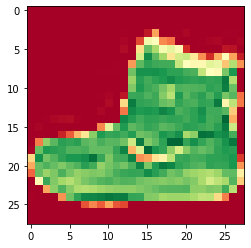

In [8]:
plt.imshow(train_data[0], cmap='RdYlGn')

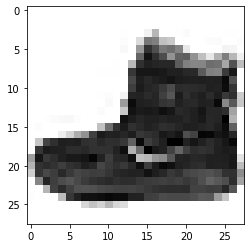

In [9]:
plt.imshow(train_data[0], cmap=plt.cm.binary)

#### 2. Для моделювання використати 3 класи індекси яких взяти відповідно до номеру у списку групи у наведеній нижче таблиці. 

In [10]:
individual_classes_to_predict = [2, 3, 8]

In [11]:
individual_classes_to_predict_mapping = {2:'Pullover', 3:'Dress', 8:'Bag'}

In [12]:
train_indexes = np.where(np.in1d(train_labels, individual_classes_to_predict))
test_indexes = np.where(np.in1d(test_labels, individual_classes_to_predict))

In [13]:
X_train = train_data[train_indexes]
y_train = train_labels[train_indexes]
X_test = test_data[test_indexes]
y_test = test_labels[test_indexes]

In [14]:
# y_train = [individual_classes_to_predict_mapping[i] for i in y_train]
# y_test = [individual_classes_to_predict_mapping[i] for i in y_test]

In [15]:
pd.DataFrame(y_train).value_counts()

2    6000
3    6000
8    6000
dtype: int64

In [16]:
tf.random.set_seed(42)

In [17]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(9, activation='softmax')
])

In [18]:
%%time

model_1.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
    metrics=['accuracy'])

with tf.device('/CPU:0'):
    non_norm_history = model_1.fit(X_train,
                                   y_train,
                                   epochs=10,
                                   validation_split=0.1)

Epoch 1/10
507/507 [==============================] - 3s 4ms/step - loss: 1.8691 - accuracy: 0.4918 - val_loss: 1.2208 - val_accuracy: 0.6117
Epoch 2/10
507/507 [==============================] - 2s 4ms/step - loss: 1.1153 - accuracy: 0.6101 - val_loss: 1.0014 - val_accuracy: 0.6383
Epoch 3/10
507/507 [==============================] - 2s 4ms/step - loss: 0.8739 - accuracy: 0.6265 - val_loss: 0.8180 - val_accuracy: 0.6422
Epoch 4/10
507/507 [==============================] - 2s 4ms/step - loss: 0.7715 - accuracy: 0.6296 - val_loss: 0.7077 - val_accuracy: 0.6378
Epoch 5/10
507/507 [==============================] - 2s 4ms/step - loss: 0.7068 - accuracy: 0.6345 - val_loss: 0.6412 - val_accuracy: 0.6461
Epoch 6/10
507/507 [==============================] - 2s 4ms/step - loss: 0.6531 - accuracy: 0.6424 - val_loss: 0.6188 - val_accuracy: 0.6567
Epoch 7/10
507/507 [==============================] - 2s 4ms/step - loss: 0.6081 - accuracy: 0.6439 - val_loss: 0.5581 - val_accuracy: 0.6594
Epoch 

In [19]:
from sklearn.base import TransformerMixin

In [20]:
class ImgScaler(TransformerMixin):
    
    def __init__(self, min_=0, max_=255):
        self.min = min_
        self.max = max_
        
    def fit_transform(self, data):
        data_scaled = (data - self.min)/(self.max - self.min)
        return data_scaled
    
    def transform(self, data):
        data_scaled = (data - self.min)/(self.max - self.min)
        return data_scaled

    def inverse_transform(self, data_scaled):
        data = data_scaled * (self.max - self.min) + self.min
        return data

In [21]:
scaler = ImgScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(9, activation='softmax')
])

In [23]:
%%time
model_2.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
    metrics=['accuracy'])

with tf.device('/CPU:0'):
    norm_history = model_2.fit(X_train_scaled,
                               y_train,
                               epochs=10,
                               validation_split=0.1)

Epoch 1/10
507/507 [==============================] - 3s 4ms/step - loss: 0.7831 - accuracy: 0.6649 - val_loss: 0.2096 - val_accuracy: 0.9472
Epoch 2/10
507/507 [==============================] - 2s 4ms/step - loss: 0.2060 - accuracy: 0.9420 - val_loss: 0.1577 - val_accuracy: 0.9533
Epoch 3/10
507/507 [==============================] - 2s 4ms/step - loss: 0.1812 - accuracy: 0.9501 - val_loss: 0.1451 - val_accuracy: 0.9622
Epoch 4/10
507/507 [==============================] - 2s 4ms/step - loss: 0.1671 - accuracy: 0.9541 - val_loss: 0.1377 - val_accuracy: 0.9594
Epoch 5/10
507/507 [==============================] - 2s 4ms/step - loss: 0.1554 - accuracy: 0.9594 - val_loss: 0.1262 - val_accuracy: 0.9661
Epoch 6/10
507/507 [==============================] - 2s 4ms/step - loss: 0.1491 - accuracy: 0.9608 - val_loss: 0.1267 - val_accuracy: 0.9650
Epoch 7/10
507/507 [==============================] - 2s 4ms/step - loss: 0.1442 - accuracy: 0.9628 - val_loss: 0.1207 - val_accuracy: 0.9678
Epoch 

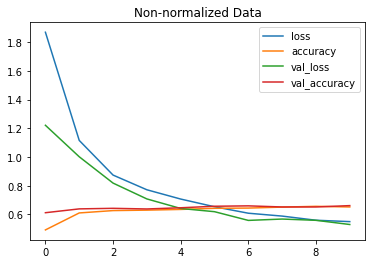

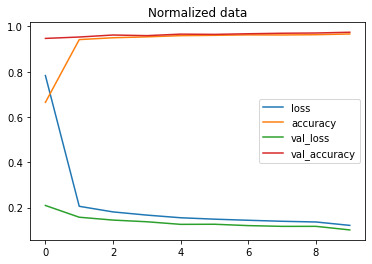

In [25]:
# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized Data")
# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data");

#### 4. Здійснити вибір оптимального кроку градієнтного алгоритму (learning_rate), а також побудову Confusion Matrix. 

In [30]:
%%time
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(9, activation='softmax')
])

model_3.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
    metrics=['accuracy'])

Wall time: 38 ms


In [27]:
%%time
# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/10))

with tf.device('/GPU:0'):
    find_lr_history = model_3.fit(X_train_scaled,
                                  y_train,
                                  epochs=20,
                                  validation_split=0.1, 
                                  callbacks=[lr_scheduler])


Epoch 1/20
507/507 [==============================] - 3s 7ms/step - loss: 0.0825 - accuracy: 0.9770 - val_loss: 0.0865 - val_accuracy: 0.9728
Epoch 2/20
507/507 [==============================] - 3s 7ms/step - loss: 0.0779 - accuracy: 0.9777 - val_loss: 0.0843 - val_accuracy: 0.9728
Epoch 3/20
507/507 [==============================] - 3s 6ms/step - loss: 0.0777 - accuracy: 0.9779 - val_loss: 0.0949 - val_accuracy: 0.9728
Epoch 4/20
507/507 [==============================] - 3s 6ms/step - loss: 0.0798 - accuracy: 0.9763 - val_loss: 0.0982 - val_accuracy: 0.9739
Epoch 5/20
507/507 [==============================] - 3s 7ms/step - loss: 0.0763 - accuracy: 0.9787 - val_loss: 0.0882 - val_accuracy: 0.9739
Epoch 6/20
507/507 [==============================] - 3s 6ms/step - loss: 0.0806 - accuracy: 0.9775 - val_loss: 0.0932 - val_accuracy: 0.9750
Epoch 7/20
507/507 [==============================] - 3s 6ms/step - loss: 0.0828 - accuracy: 0.9762 - val_loss: 0.0941 - val_accuracy: 0.9728
Epoch 

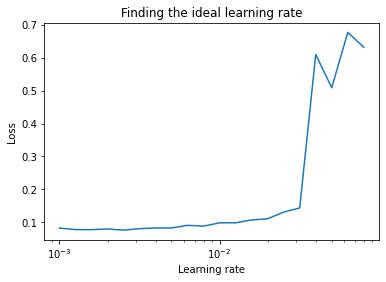

In [29]:
lrs = 1e-3 * (10**(np.arange(20)/10))
plt.semilogx(lrs, find_lr_history.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

In [40]:
find_lr_history_df = pd.DataFrame(find_lr_history.history)

In [41]:
optimal_lr = find_lr_history_df.loc[find_lr_history_df['loss'].idxmin()]['lr']

In [57]:
# Optimal model
model_opt = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(6, activation="relu"),
  tf.keras.layers.Dense(12, activation="relu"),
  tf.keras.layers.Dense(9, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_opt.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=optimal_lr),
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
                  metrics=['accuracy'])

# Fit the model
history = model_opt.fit(X_train_scaled,
                        y_train,
                        epochs=15,
                        validation_split=0.1)

Epoch 1/15
507/507 [==============================] - 3s 5ms/step - loss: 0.2268 - accuracy: 0.9237 - val_loss: 0.0920 - val_accuracy: 0.9700
Epoch 2/15
507/507 [==============================] - 2s 5ms/step - loss: 0.1069 - accuracy: 0.9694 - val_loss: 0.0881 - val_accuracy: 0.9728
Epoch 3/15
507/507 [==============================] - 2s 5ms/step - loss: 0.0970 - accuracy: 0.9719 - val_loss: 0.0869 - val_accuracy: 0.9739
Epoch 4/15
507/507 [==============================] - 2s 5ms/step - loss: 0.0886 - accuracy: 0.9735 - val_loss: 0.0885 - val_accuracy: 0.9717
Epoch 5/15
507/507 [==============================] - 2s 5ms/step - loss: 0.0863 - accuracy: 0.9739 - val_loss: 0.1075 - val_accuracy: 0.9689
Epoch 6/15
507/507 [==============================] - 2s 5ms/step - loss: 0.0822 - accuracy: 0.9749 - val_loss: 0.0925 - val_accuracy: 0.9700
Epoch 7/15
507/507 [==============================] - 2s 5ms/step - loss: 0.0809 - accuracy: 0.9740 - val_loss: 0.0815 - val_accuracy: 0.9728
Epoch 

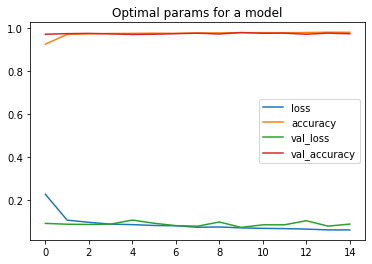

In [58]:
pd.DataFrame(history.history).plot(title="Optimal params for a model");

In [60]:
y_pred = model_opt.predict(X_test_scaled)

In [59]:
from sklearn.metrics import confusion_matrix

In [68]:
y_pred_res = []
for elem in y_pred:
    y_pred_res.append(elem.argmax())

In [69]:
confusion_matrix(y_test, y_pred_res)

array([[963,  28,   9],
       [ 30, 963,   7],
       [  9,   8, 983]], dtype=int64)

In [74]:
from tensorflow.keras.utils import plot_model

# See the inputs and outputs of each layer
plot_model(model_opt, show_shapes=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


#### Висновок

На даній лабораторній роботі я побудував нейронну мережу для багатокласової класифікації. А також порівняв результати з (95%+) та без (65%+) нормалізації данних. Змінюючи параметри нейронної мережі я покращував точність моделі. Також було знайдено оптимальний параметр навчання (learning rate) рівний 1e-3 і побудовано матрицю помилок